In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\dlion\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
dataset= pd.read_csv('Ads_CTR_Optimisation.csv')

In [5]:
# Implementing random selection
import random
N=10000
d = 10
ads_selected =[]
total_reward =0
for i in range(0,N):
    ad=random.randrange(d)
    ads_selected.append(ad)
    reward= dataset.values[i,ad]
    total_reward += reward

Text(0, 0.5, 'Ad frequency')

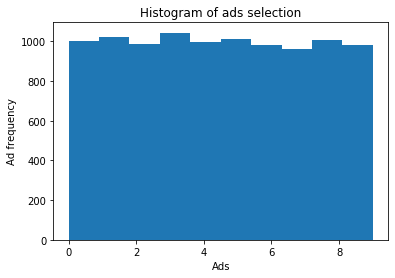

In [10]:
# Visualizing the results - Histogram
plt.hist(ads_selected, bins=10)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Ad frequency')


In [11]:
total_reward

1247

In [16]:
#  Implementing UCB (from scratch)
import math

N=10000
d=10
ads_selected =[]
numbers_of_selections=[0]*d
sums_of_rewards =[0]*d
total_reward=0
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if(numbers_of_selections[i]>0):
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward+ delta_i
        else:
            upper_bound=1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n,ad]
    sums_of_rewards[ad] += reward
    total_reward +=reward 

In [17]:
total_reward

2178

In [19]:
pd.DataFrame(ads_selected)

,0
0,0
1,1
2,2
3,3
4,4
...,...
9995,4
9996,4
9997,4
9998,4


Text(0, 0.5, 'Ad frequency')

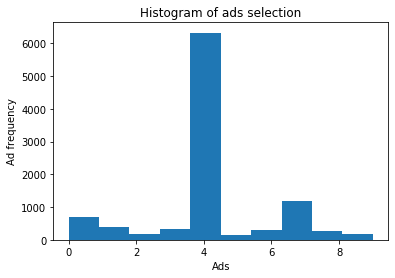

In [20]:
# Visualizing the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Ad frequency')